In [46]:
import pandas as pd
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
from yellowbrick.classifier import ConfusionMatrix

#### Importação e análise descritiva da base

In [47]:
uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
df = pd.read_csv(uri)

In [48]:
df.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [49]:
df.describe()

,Unnamed: 0,mileage_per_year,model_year,price
count,10000.00000,10000.000000,10000.00000,10000.000000
mean,4999.50000,14183.391200,2004.14420,64842.373698
std,2886.89568,5008.571422,4.68758,25250.592393
min,0.00000,363.000000,1998.00000,-840.360000
25%,2499.75000,10474.750000,2000.00000,44796.375000
50%,4999.50000,13418.500000,2003.00000,65225.685000
75%,7499.25000,17176.750000,2007.00000,85111.237500
max,9999.00000,39572.000000,2017.00000,118929.720000


In [50]:
df.sold.value_counts()

yes    5800
no     4200
Name: sold, dtype: int64

#### Transformação dos dados

In [51]:
replace_dic = {
    'no': 0,
    'yes': 1
}
df.sold = df.sold.map(replace_dic)
df.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [52]:
# Convertendo ano do modelo por quantos anos tem o carro
corrent_year = datetime.today().year
df['years_old'] = corrent_year - df.model_year

df.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,years_old
0,0,21801,2000,30941.02,1,22
1,1,7843,1998,40557.96,1,24
2,2,7109,2006,89627.50,0,16
3,3,26823,2015,95276.14,0,7
4,4,7935,2014,117384.68,1,8


#### Separando a base entre preditores e classe

In [53]:
X = df[['mileage_per_year', 'price', 'years_old']]
y = df['sold']

#### Separando entre base de treino e teste

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [55]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7500, 3), (2500, 3), (7500,), (2500,))

In [56]:
scaler = StandardScaler()
scaler.fit(X_train, y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Treinando o modelo

In [57]:
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [58]:
model.feature_importances_

array([0.15310975, 0.84689025, 0.        ])

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

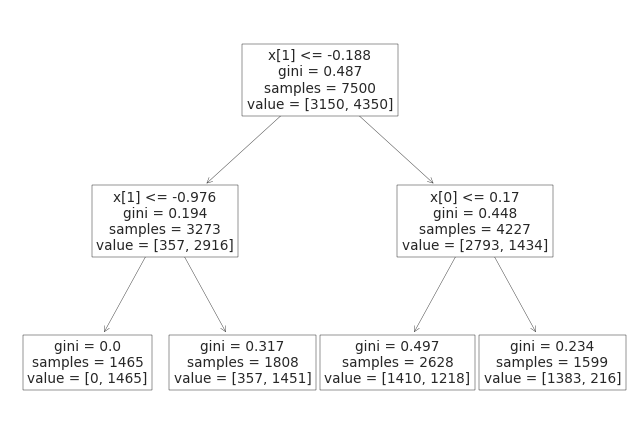

In [59]:
tree.plot_tree(model);

In [60]:
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

0.748

0.748

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

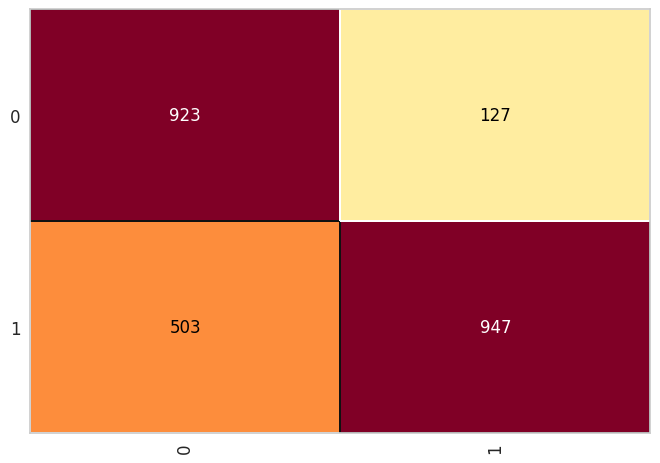

In [61]:
cm = ConfusionMatrix(model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [62]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.65      0.88      0.75      1050
           1       0.88      0.65      0.75      1450

    accuracy                           0.75      2500
   macro avg       0.76      0.77      0.75      2500
weighted avg       0.78      0.75      0.75      2500

